<a href="https://colab.research.google.com/github/VyPham23/Handwritten-Digit-Recognization/blob/main/Handwritingnumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
N, d = mnist.data.shape
print('N=', N)
print('d=', d)

N= 70000
d= 784


In [ ]:
x_all, y_all = fetch_openml('mnist_784', version = 1, return_X_y=True, as_frame=False)

x0 = x_all[np.where(y_all == '0')[0]]
x1 = x_all[np.where(y_all == '1')[0]]

In [ ]:
x0 = x0[:1000,:]
x1 = x1[:1000,:]

In [ ]:
x0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y0 = np.zeros(x0.shape[0])
y1 = np.ones(x1.shape[0])
y1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
x = np.concatenate((x0,x1), axis=0)
y = np.concatenate((y0,y1))
y

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
one = np.ones((x.shape[0], 1))
X = np.concatenate((x,one), axis=1)

X

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
def sigmoid(s):
  return 1/(1+np.exp(-s))

In [ ]:
def sgd(X, y, theta_init, eta = 0.05, gamma = 0.9):

  theta_old = theta_init
  theta_epoch = theta_init
  v_old = np.zeros_like(theta_init)
  N = X.shape[0]

  for it in range(10000):
    mix_id = np.random.permutation(N)

    for i in mix_id:
      xi = X[i, :]
      yi = y[i]
      hi = sigmoid(np.dot(xi,theta_old.T))
      gi = (hi-yi)*xi

      v_new = gamma*v_old+eta*gi
      
      theta_new = theta_old - v_new
      theta_old = theta_new
      v_old = v_new

      if(np.linalg.norm(theta_epoch - theta_old) < 1e-3):
        break
    
    theta_epoch = theta_old

  return (theta_epoch, it)

In [ ]:
theta_init = np.random.rand(1, X.shape[1])[0]

theta_init

array([0.97900889, 0.78802509, 0.27784648, 0.74990888, 0.95596229,
       0.01242216, 0.02776259, 0.03637873, 0.76962879, 0.329671  ,
       0.52934983, 0.25835135, 0.59739866, 0.43054647, 0.36753165,
       0.80047194, 0.31046739, 0.7178762 , 0.32866322, 0.73456336,
       0.68673646, 0.71439255, 0.64147507, 0.583688  , 0.9497033 ,
       0.12599161, 0.51479717, 0.84642966, 0.11310517, 0.80815323,
       0.60286542, 0.52959171, 0.29416267, 0.67123609, 0.52747256,
       0.57183446, 0.74386267, 0.31358301, 0.78002612, 0.52717673,
       0.59874093, 0.54420389, 0.48331924, 0.46860265, 0.49796869,
       0.01570614, 0.26246212, 0.07461674, 0.07546679, 0.53853196,
       0.96607792, 0.0775706 , 0.43088513, 0.6263949 , 0.77594506,
       0.73050934, 0.38279156, 0.58326819, 0.70249557, 0.7543855 ,
       0.97866902, 0.21004978, 0.01130045, 0.06837736, 0.00487463,
       0.40533501, 0.69485588, 0.76645161, 0.91202893, 0.63798851,
       0.66319375, 0.6799692 , 0.61993666, 0.6030736 , 0.27831

In [ ]:
theta_init.shape

(785,)

In [ ]:
(theta, it) = sgd(X, y, theta_init)
print('Theta:', theta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Theta: [ 9.79008891e-01  7.88025088e-01  2.77846480e-01  7.49908883e-01
  9.55962292e-01  1.24221555e-02  2.77625947e-02  3.63787336e-02
  7.69628789e-01  3.29671001e-01  5.29349834e-01  2.58351350e-01
  5.97398656e-01  4.30546469e-01  3.67531647e-01  8.00471944e-01
  3.10467388e-01  7.17876204e-01  3.28663219e-01  7.34563359e-01
  6.86736464e-01  7.14392551e-01  6.41475067e-01  5.83688004e-01
  9.49703302e-01  1.25991609e-01  5.14797165e-01  8.46429665e-01
  1.13105168e-01  8.08153229e-01  6.02865415e-01  5.29591705e-01
  2.94162672e-01  6.71236094e-01  5.27472563e-01  5.71834456e-01
  7.43862669e-01  3.13583009e-01  7.80026117e-01  5.27176726e-01
  5.98740929e-01  5.44203886e-01  4.83319238e-01 -8.95313973e+01
 -2.45502031e+02 -1.16984294e+02  2.62462115e-01  7.46167408e-02
  7.54667931e-02  5.38531965e-01  9.66077919e-01  7.75706022e-02
  4.30885130e-01  6.26394900e-01  7.75945061e-01  7.30509336e-01
  3.82791556e-01  5.83268190e-01  7.02495571e-01  7.54385505e-01
  9.78669019e-01  

In [ ]:
print('Interation:', it)

Interation: 9999


In [ ]:
np.savetxt('theta.txt', theta)

**Model starts here**

In [ ]:
theta = np.loadtxt('/content/theta.txt')
theta.shape[0]

785

In [ ]:
import cv2
import joblib
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/101010.jpg')

img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_grey = cv2.GaussianBlur(img_grey, (5,5), 0)

_, im_th = cv2.threshold(img_grey, 155, 255, cv2.THRESH_BINARY_INV)

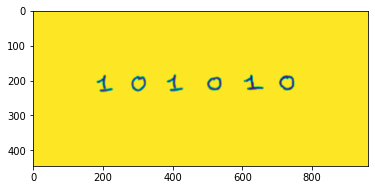

In [ ]:
plt.imshow(img_grey)

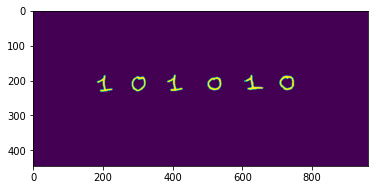

In [ ]:
plt.imshow(im_th)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


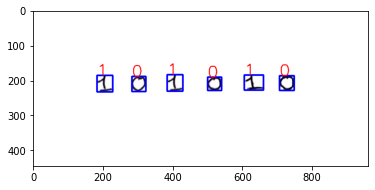

In [ ]:
ctrs, _ = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
  cv2.rectangle(img, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (0,0,255), 3)

  length = int(rect[3]*1.6)

  pt1 = int(rect[1] + rect[3]//2 - length//2)
  pt2 = int(rect[0] + rect[2]//2 - length//2)

  roi = im_th[pt1:pt1+length, pt2:pt2+length]
  roi = cv2.resize(roi, (28,28), interpolation = cv2.INTER_AREA)
  roi = cv2.dilate(roi, (3,3))

  x = np.array([roi]).reshape(1,28*28)
  one = np.ones((x.shape[0],1))
  x = np.concatenate((x,one), axis=1)

  prediction = sigmoid(np.dot(x, theta.T))

  cv2.putText(img,str(int(prediction)), (rect[0], rect[1]), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,0,0), 2)


plt.imshow(img)